In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 2.1 Reading the dataset and preprocessing

In [51]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2.2 Data visualization

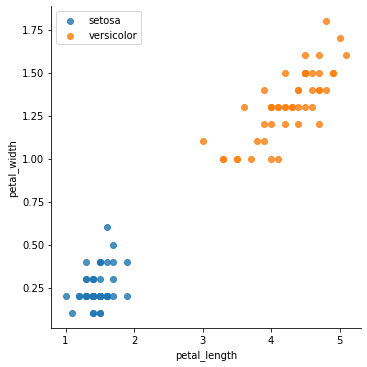

In [53]:
df = iris[iris['species'] != 'virginica']
sns.lmplot(data=df, x = 'petal_length', y = 'petal_width', hue = 'species', fit_reg=False, legend=False, height=5)
plt.legend()
plt.show()

## 2.3 Train a binary SVC

In [54]:
from sklearn import svm

In [55]:
X = df[['petal_length', 'petal_width']]  # petal length, petal width
species = {'setosa': 0, 'versicolor': 1}
y = [species[x] for x in df["species"]]

In [56]:
clf = svm.SVC(kernel = 'linear', C = 1E10)
clf.fit(X, y)
w = clf.coef_[0]
b = clf.intercept_[0]

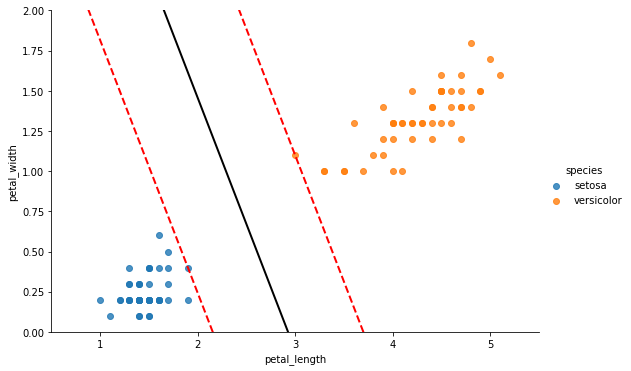

In [57]:
x0 = np.linspace(0.5, 5.5, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin
sns.lmplot(data=df, x = 'petal_length', y = 'petal_width', hue = 'species', fit_reg=False, legend=True, height=5, aspect=1.5)
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.plot(x0, gutter_up, "r--", linewidth=2)
plt.plot(x0, gutter_down, "r--", linewidth=2)
plt.axis([0.5, 5.5, 0, 2])
plt.show()

## 2.4 Checking sensitivity to scaling